In [25]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_2')
dir = os.getcwd()
dir

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_2'

In [3]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [4]:
files = os.listdir(train_data)
print(files[:3])

['angry', 'disgusted', 'fearful']


### CNN model for training 

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [6]:
#  mod = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax")

## Tranfer Learning

In [19]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [20]:
ip=mod.layers[0].input
op=mod.layers[-2].output


In [21]:
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [22]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_7')>

In [23]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_97 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [13]:
# model = tf.keras.models.Sequential([
    
#     op,
#     tf.keras.layers.Dense(1024 , activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512 , activation='relu'),
#     tf.keras.layers.Dense(7 , activation='softmax')
    
# ])

In [14]:
# model.summary()

In [25]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

# Augmentation


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,#rotates the image in 0 to 40 degree range randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'# lost pixels are replaced by the nearest pixels
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=50,validation_data=test_data_gen, verbose=1 ,batch_size =10 )

Epoch 1/50
1000/1000 [==============================] - 927s 913ms/step - loss: 1.5821 - accuracy: 0.3828 - val_loss: 1.2958 - val_accuracy: 0.5146
Epoch 2/50
1000/1000 [==============================] - 909s 909ms/step - loss: 1.2800 - accuracy: 0.5221 - val_loss: 1.1783 - val_accuracy: 0.5567
Epoch 3/50
1000/1000 [==============================] - 909s 909ms/step - loss: 1.1622 - accuracy: 0.5813 - val_loss: 1.2653 - val_accuracy: 0.5359
Epoch 4/50
1000/1000 [==============================] - 909s 909ms/step - loss: 1.0895 - accuracy: 0.6083 - val_loss: 1.0378 - val_accuracy: 0.6165
Epoch 5/50
1000/1000 [==============================] - 911s 911ms/step - loss: 1.0301 - accuracy: 0.6333 - val_loss: 1.0697 - val_accuracy: 0.6188
Epoch 6/50
1000/1000 [==============================] - 918s 918ms/step - loss: 0.9565 - accuracy: 0.6575 - val_loss: 1.1211 - val_accuracy: 0.6063
Epoch 7/50
1000/1000 [==============================] - 910s 910ms/step - loss: 0.9292 - accuracy: 0.6691 - val_

In [29]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.38280001282691956, 0.5220999717712402, 0.5813000202178955, 0.608299970626831, 0.6333000063896179, 0.6574657559394836, 0.6690999865531921, 0.6986698508262634, 0.7153715491294861, 0.7346000075340271, 0.7592999935150146, 0.7663999795913696, 0.7950000166893005, 0.801800012588501, 0.8176817893981934, 0.8287000060081482, 0.8458999991416931, 0.8611999750137329, 0.8615999817848206, 0.8730000257492065, 0.8751000165939331, 0.8899890184402466, 0.897989809513092, 0.9020000100135803, 0.9085908532142639, 0.90829998254776, 0.9163916110992432, 0.9172999858856201, 0.9240000247955322, 0.9223999977111816, 0.9294999837875366, 0.9329000115394592, 0.9335933327674866, 0.9337933659553528, 0.939300000667572, 0.9402999877929688, 0.9452999830245972, 0.9492999911308289, 0.9461946487426758, 0.9430999755859375, 0.9495999813079834, 0.9495000243186951, 0.9505950808525085, 0.953000009059906, 0.955299973487854, 0.9528999924659729, 0.9532999992370605, 0.9549999833106995, 0.9559999704360962, 0.9574957489967346]
[0.514

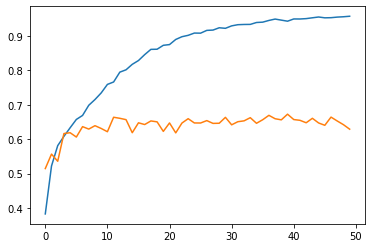

In [30]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()